Now we want to try a Naı̈ve Bayes classification task with continuous feature variables. The file ban-
knote authentication.csv contains 100 examples of genuine and forged banknotes. These images were
analysed with a wavelet transform tool that generated four continuous features: variance, skewness, cur-
tosis and entropy (of each image). For each feature in both classes, fit a Gaussian distribution to that
feature and use this to make the predictions.

(a) Plot 8 separate histograms: one for each variable under each class. Do they look like Gaussian
distributions, and so how well do you expect this to work?

(b) Train a NB classifier on a random 80% of the data, and use the remaining 20% to generate a confusion
matrix showing its performance.

Imports needed:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Read the data

In [6]:
data = pd.read_csv('banknote_authentication.csv', sep=';')

Split the data into genuine and forged banknotes

In [7]:
genuine = data[data['class'] == 0]
forged = data[data['class'] == 1]

Plot the histograms for each feature under each class

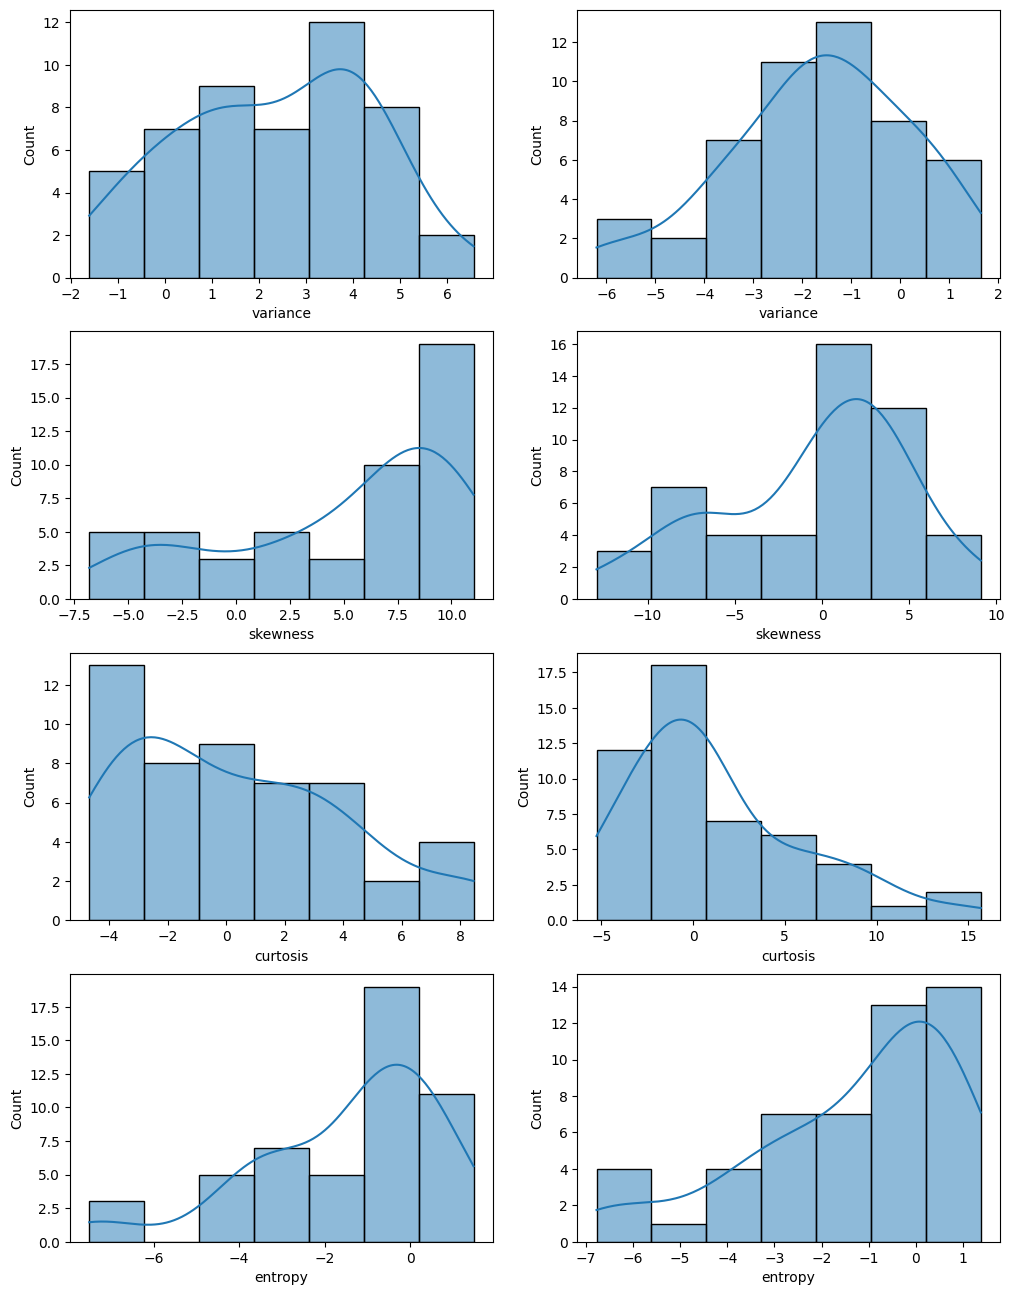

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
sns.histplot(genuine['variance'], ax=axes[0,0], kde=True)
sns.histplot(forged['variance'], ax=axes[0,1], kde=True)
sns.histplot(genuine['skewness'], ax=axes[1,0], kde=True)
sns.histplot(forged['skewness'], ax=axes[1,1], kde=True)
sns.histplot(genuine['curtosis'], ax=axes[2,0], kde=True)
sns.histplot(forged['curtosis'], ax=axes[2,1], kde=True)
sns.histplot(genuine['entropy'], ax=axes[3,0], kde=True)
sns.histplot(forged['entropy'], ax=axes[3,1], kde=True)
plt.show()

Split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=0)

Train the model

In [10]:
model = GaussianNB()

Predict the test set

In [11]:
y_pred = model.fit(X_train, y_train).predict(X_test)

Plot a confusion matrix showing its performance

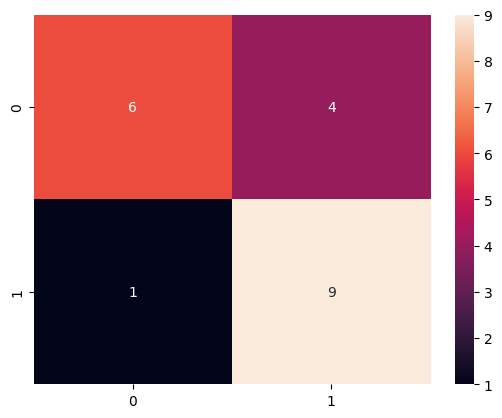

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()